In [131]:
import matplotlib.pylab as plt
%matplotlib inline
import pandas
import numpy as np
import scipy as sp
import scipy.stats

In [132]:
def mean_confidence_interval(data, confidence=0.95):
    N=len(data[0])
    c=len(data)
    m=[]
    h=[]
    for i in range(N):
        a=[]
        for j in range(c):
            a.append(data[j][i])
        a = np.array(a)
        mm, se = np.mean(a), scipy.stats.sem(a)
        hh = se * sp.stats.t._ppf((1+confidence)/2., c-1)
        m.append(mm)
        h.append(hh)
    return m, h

In [143]:
def meanCurvesT(xls, expCode, expNumbers, confidence=0.95, plot=True, numPoints=200, s0=-1):
    data=[]
    for N in expNumbers:
        data.append(pandas.read_excel(xls, sheet_name=expCode+'-{:02d}'.format(N)))   
    tmax=100000
    stress0=s0
    for i in range(len(data)):
        data[i]=data[i][data[i]['деформация']>=0]
        if s0<0:
            stress0=0.05*data[i]['напряжение(МПа)'].max()
        data[i]=data[i][data[i]['напряжение(МПа)']>=stress0]
        data[i].index=range(len(data[i]))
        data[i]['время(мкс)']-=data[i]['время(мкс)'][0]
        tmax=min(tmax, data[i]['время(мкс)'][len(data[i])-1]) 
    tt=np.linspace(0,tmax,numPoints)
    ee=[]
    ss=[]
    dee=[]
    for d in data:
        ee.append(np.interp(tt, d['время(мкс)'], d['деформация']))
        ss.append(np.interp(tt, d['время(мкс)'], d['напряжение(МПа)']))
        dee.append(np.interp(tt, d['время(мкс)'], d['скорость деформации(1/c)']))
    e, he = mean_confidence_interval(ee, confidence)
    s, hs = mean_confidence_interval(ss, confidence)
    de, hde = mean_confidence_interval(dee, confidence) 
    if plot:
        for d in data:
            plt.plot(d['деформация'], d['напряжение(МПа)'])
        plt.errorbar(e,s,yerr=hs, xerr=he,color='k', errorevery=3)
        plt.grid()        
        plt.figure()
        for d in data:
            plt.plot(d['время(мкс)'], d['деформация'])
        plt.grid()
        plt.errorbar(tt, e, yerr=he, color='k', errorevery=3)        
        plt.figure()
        for d in data:
            plt.plot(d['время(мкс)'], d['напряжение(МПа)'])
        plt.grid()
        plt.errorbar(tt, s, yerr=hs, color='k', errorevery=3)  
    return {'e': e, 's': s, 'de': de, 'he': he, 'hs': hs, 'hde': hde}

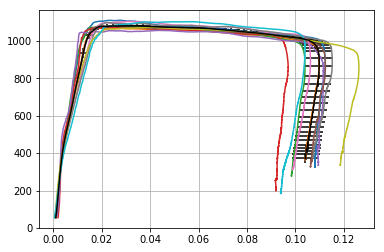

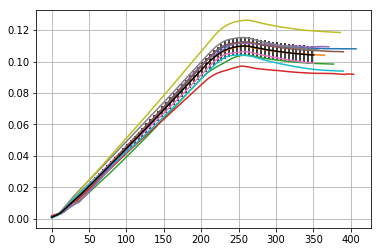

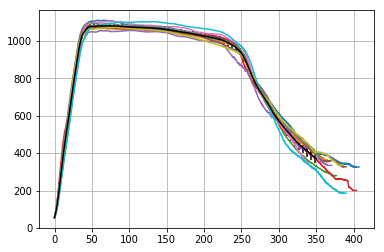

In [144]:
NN=[1,2,3,4,5,6,7,8,9,10]
r=meanCurvesT('test.xls', 't633', NN)

In [139]:
def meanCurvesE(xls, expCode, expNumbers, confidence=0.95, plot=True, numPoints=200):
    data=[]
    for N in expNumbers:
        data.append(pandas.read_excel(xls, sheet_name=expCode+'-{:02d}'.format(N)))   
    mine=-10000
    maxe=10000
    for i in range(len(data)):
        j=data[i]['деформация'].idxmax()
        maxe=min(maxe, data[i]['деформация'].max())
        mine=max(mine, data[i]['деформация'][0])
        data[i]=data[i][:j]
        data[i].index=range(len(data[i]))
    #    plt.plot(data[i]['деформация'], data[i]['напряжение(МПа)'])
    eee=np.linspace(mine,maxe,numPoints)
    #ee=[]
    ss=[]
    dee=[]
    for d in data:
    #    ee.append(np.interp(tt, d['время(мкс)'], d['деформация']))
        ss.append(np.interp(eee, d['деформация'], d['напряжение(МПа)']))
        dee.append(np.interp(eee, d['деформация'], d['скорость деформации(1/c)']))
    #e, he = mean_confidence_interval(ee, confidence)
    s, hs = mean_confidence_interval(ss, confidence)
    de, hde = mean_confidence_interval(dee, confidence) 
    if plot:
        for d in data:
            plt.plot(d['деформация'], d['напряжение(МПа)'])
        plt.errorbar(eee,s,yerr=hs,color='k', errorevery=5)
        plt.grid()        
        plt.twinx()
        for d in data:
            plt.plot(d['деформация'], d['скорость деформации(1/c)'])
        plt.errorbar(eee,de,yerr=hde,color='k', errorevery=5)
    return {'e': eee, 's': s, 'de': de, 'hs': hs, 'hde': hde}

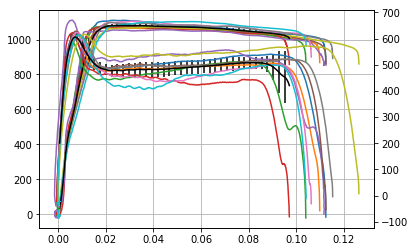

In [142]:
NN=[1,2,3,4,5,6,7,8,9,10]
r=meanCurvesE('test.xls', 't633', NN)